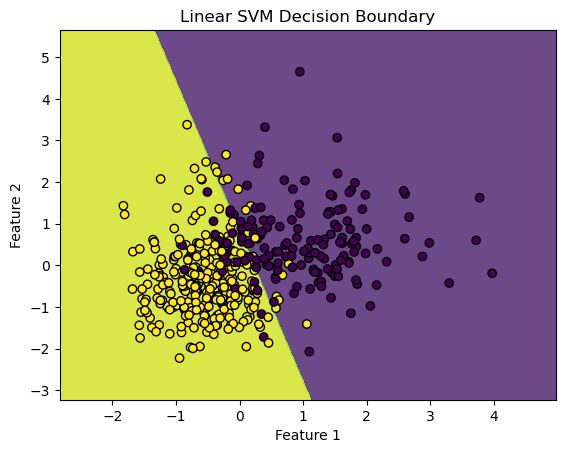

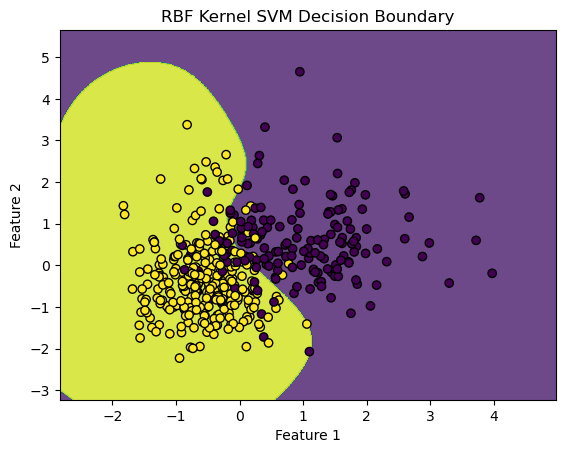

Best hyperparameters: {'C': 10, 'gamma': 0.1}
Cross-validation accuracy: 0.896 ± 0.027
Test set accuracy: 0.912


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Load and prepare dataset
# Using the Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# For visualization, we'll reduce to 2 features via PCA or just select 2 features
# Let's select two features for simplicity: mean radius and mean texture
X = X[:, [0, 1]]  

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test (optional, for evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#  Train SVM with linear kernel
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)

#  Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

#  Visualize decision boundary
def plot_decision_boundary(clf, X, y, title):
    # Set min/max values and meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot for linear SVM
plot_decision_boundary(svm_linear, X_train, y_train, 'Linear SVM Decision Boundary')

# Plot for RBF SVM
plot_decision_boundary(svm_rbf, X_train, y_train, 'RBF Kernel SVM Decision Boundary')

#  Hyperparameter tuning
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 'auto', 0.001, 0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

#  Evaluate with cross-validation
scores = cross_val_score(
    grid_search.best_estimator_, X_scaled, y, cv=5, scoring='accuracy'
)
print(f"Cross-validation accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

# Optional: evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print(f"Test set accuracy: {test_score:.3f}")